In [1]:
import optics_design_workbench.jupyter_utils as odw

# Loading the data

The simulation workers dump their results to disk every few seconds. A new folder is created for every "run simulation" button press in FreeCAD. 

The dumped files are stored in python's pickle format. Feel free to load one manually using pickle if you are curious.

The "jupyter_utils" module contains convenience functions to load and discover the folders:  

In [ ]:
# show all run folders in current project
odw.rawFolders().paths()

['../raw/simulation-run-000000',
 '../raw/simulation-run-000001',
 '../raw/simulation-run-000002']

In [9]:
# load all hit files of latest run
latest = odw.latestRawFolder().loadHits()

[Optics Design 19:58:58.569862] finding all result files in /home/bredol/Projects/freecad.optics_design_workbench/examples/1-source-and-detector/main.OpticsDesign/raw/simulation-run-000002/**/*-hits.pkl


In [ ]:
# the "hits" attribute holds all stored data in dictionary form:
latest.hits

{'source': 'OpticalPointSource',
 'obj': 'OpticalAbsorberGroup',
 'points': array([[ 0.48090548,  4.06468737, 50.        ],
        [ 0.27781976, -2.95644208, 50.        ],
        [ 0.50542407, -2.43864821, 50.        ],
        ...,
        [-3.74938087,  0.28421942, 50.        ],
        [ 4.76346628, -0.38160282, 50.        ],
        [ 0.79342351, -0.42353183, 50.        ]], shape=(8144, 3)),
 'directions': array([[ 0.00958604,  0.08102273,  0.99666616],
        [ 0.00554662, -0.05902484,  0.9982411 ],
        [ 0.01009597, -0.04871257,  0.99876181],
        ...,
        [-0.07477647,  0.00566838,  0.99718421],
        [ 0.09483717, -0.00759744,  0.99546381],
        [ 0.0158659 , -0.00846927,  0.99983826]], shape=(8144, 3)),
 'powers': array([1, 1, 1, ..., 1, 1, 1], shape=(8144,)),
 'isEntering': array([1, 1, 1, ..., 1, 1, 1], shape=(8144,))}

In [ ]:
# array with all absorber hit points
latest.hits['points']

array([[ 0.48090548,  4.06468737, 50.        ],
       [ 0.27781976, -2.95644208, 50.        ],
       [ 0.50542407, -2.43864821, 50.        ],
       ...,
       [-3.74938087,  0.28421942, 50.        ],
       [ 4.76346628, -0.38160282, 50.        ],
       [ 0.79342351, -0.42353183, 50.        ]], shape=(8144, 3))

# Analyze and plot the results

Of course any numpy/scipy/pandas or other tools can now be fed with the data arrays. Projection to the detector plane and shortcuts for histogram calculations are included in the Hit objects methods:

In [ ]:
# detect detector plane normal
latest.planeProject3dPoints()

array([[ 0.48090548, -4.06468735],
       [ 0.27781976,  2.9564421 ],
       [ 0.50542407,  2.43864823],
       ...,
       [-3.74938087, -0.2842194 ],
       [ 4.76346628,  0.38160284],
       [ 0.79342352,  0.42353185]], shape=(8144, 2))

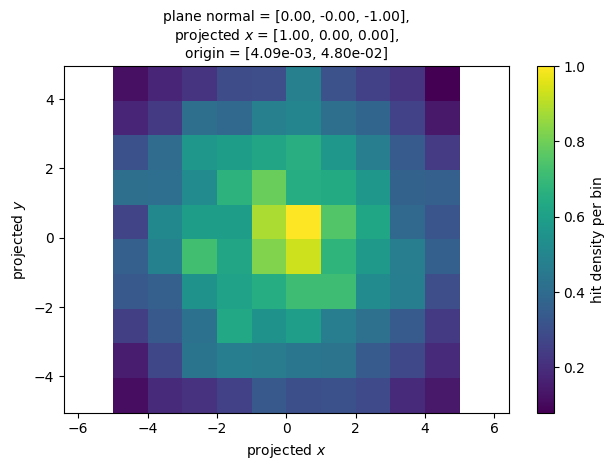

In [ ]:
# generate and plot simple histogram
latest.histogram(bins=(10,10)).plot()